In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Preprocess the data

In [2]:
# Preprocess the data
df = pd.read_excel('WisdomTree Core Equity Indexes.xlsx',sheet_name = 'All-Domestic-monthly')

In [3]:
df = df[8:]

In [4]:
df = df.rename(columns=df.iloc[0])[1:]

In [5]:
df = df.set_index('Month End')

In [6]:
df = df['2009-01-31' :'2019-02-28']

### Calculate the portfolio without rebalance

In [7]:
#Calculate the portfolio without rebalance
w_epstr = 0.5
w_meitr = 0.35
w_seitr = 0.15
df['PortfolioReturn_withoutRebalance'] = np.empty(len(df))

In [8]:
df['PortfolioReturn_withoutRebalance'].iloc[0] =  w_epstr*df['WisdomTree U.S. LargeCap Index'].iloc[0]+\
                                        w_meitr*df['WisdomTree U.S. MidCap Index'].iloc[0]+ w_seitr*df['WisdomTree U.S. SmallCap Index'].iloc[0]
for i in range(1,len(df)):
    df['PortfolioReturn_withoutRebalance'].iloc[i] =  w_epstr*((1+df['WisdomTree U.S. LargeCap Index'][:i+1]).prod()-1)+\
                                        w_meitr*((1+df['WisdomTree U.S. MidCap Index'][:i+1]).prod()-1)+\
    w_seitr*((1+df['WisdomTree U.S. SmallCap Index'][:i+1]).prod()-1)

### Calculate the portfolio weights with balancing

In [9]:
#Calculate the portfolio weights with balancing
df['w1'] = np.zeros(len(df))
df['w2'] = np.zeros(len(df))
df['w3'] = np.zeros(len(df))
df['w1'][0] = 0.5
df['w2'][0] = 0.35
df['w3'][0] = 0.15
for i in range(1,len(df.index)):
    if df.index[i].month == 2:
        df['w1'][i] = df.loc[df.index[i-1]]['w1']*(1+df['WisdomTree U.S. LargeCap Index'][:i+1]).prod()/(df.loc[df.index[i-1]]['w1']*(1+df['WisdomTree U.S. LargeCap Index'][:i+1]).prod()+\
                                        df.loc[df.index[i-1]]['w2']*(1+df['WisdomTree U.S. MidCap Index'][:i+1]).prod()+\
    df.loc[df.index[i-1]]['w3']*(1+df['WisdomTree U.S. SmallCap Index'][:i+1]).prod())
        df['w2'][i] = df.loc[df.index[i-1]]['w2']*(1+df['WisdomTree U.S. MidCap Index'][:i+1]).prod()/(df.loc[df.index[i-1]]['w1']*(1+df['WisdomTree U.S. LargeCap Index'][:i+1]).prod()+\
                                        df.loc[df.index[i-1]]['w2']*(1+df['WisdomTree U.S. MidCap Index'][:i+1]).prod()+\
    df.loc[df.index[i-1]]['w3']*(1+df['WisdomTree U.S. SmallCap Index'][:i+1]).prod())
        df['w3'][i] = df.loc[df.index[i-1]]['w3']*(1+df['WisdomTree U.S. SmallCap Index'][:i+1]).prod()/(df.loc[df.index[i-1]]['w1']*(1+df['WisdomTree U.S. LargeCap Index'][:i+1]).prod()+\
                                        df.loc[df.index[i-1]]['w2']*(1+df['WisdomTree U.S. MidCap Index'][:i+1]).prod()+\
    df.loc[df.index[i-1]]['w3']*(1+df['WisdomTree U.S. SmallCap Index'][:i+1]).prod())
    elif df.index[i].month == 8:
        df['w1'][i] = df.loc[df.index[i-1]]['w1']*(1+df['WisdomTree U.S. LargeCap Index'][:i+1]).prod()/(df.loc[df.index[i-1]]['w1']*(1+df['WisdomTree U.S. LargeCap Index'][:i+1]).prod()+\
                                        df.loc[df.index[i-1]]['w2']*(1+df['WisdomTree U.S. MidCap Index'][:i+1]).prod()+\
    df.loc[df.index[i-1]]['w3']*(1+df['WisdomTree U.S. SmallCap Index'][:i+1]).prod())
        df['w2'][i] = df.loc[df.index[i-1]]['w2']*(1+df['WisdomTree U.S. MidCap Index'][:i+1]).prod()/(df.loc[df.index[i-1]]['w1']*(1+df['WisdomTree U.S. LargeCap Index'][:i+1]).prod()+\
                                        df.loc[df.index[i-1]]['w2']*(1+df['WisdomTree U.S. MidCap Index'][:i+1]).prod()+\
    df.loc[df.index[i-1]]['w3']*(1+df['WisdomTree U.S. SmallCap Index'][:i+1]).prod())
        df['w3'][i] = df.loc[df.index[i-1]]['w3']*(1+df['WisdomTree U.S. SmallCap Index'][:i+1]).prod()/(df.loc[df.index[i-1]]['w1']*(1+df['WisdomTree U.S. LargeCap Index'][:i+1]).prod()+\
                                        df.loc[df.index[i-1]]['w2']*(1+df['WisdomTree U.S. MidCap Index'][:i+1]).prod()+\
    df.loc[df.index[i-1]]['w3']*(1+df['WisdomTree U.S. SmallCap Index'][:i+1]).prod())
    else:
        df['w1'][i] = df.loc[df.index[i-1]]['w1']
        df['w2'][i] = df.loc[df.index[i-1]]['w2']
        df['w3'][i] = df.loc[df.index[i-1]]['w3']

### Calculate the portfolio return after rebalancing the weights 

In [10]:
#Calculate the portfolio return after rebalancing the weights 
df['PortfolioReturn_withRebalance'] = np.empty(len(df))

df['PortfolioReturn_withRebalance'].iloc[0] =  df['w1'].iloc[0]*df['WisdomTree U.S. LargeCap Index'].iloc[0]+\
                                        df['w2'].iloc[0]*df['WisdomTree U.S. MidCap Index'].iloc[0]+ df['w3'].iloc[0]*df['WisdomTree U.S. SmallCap Index'].iloc[0]
for i in range(1,len(df)):
    df['PortfolioReturn_withRebalance'].iloc[i] =  df['w1'].iloc[i]*((1+df['WisdomTree U.S. LargeCap Index'][:i+1]).prod()-1)+\
                                        df['w2'].iloc[i]*((1+df['WisdomTree U.S. MidCap Index'][:i+1]).prod()-1)+\
    df['w3'].iloc[i]*((1+df['WisdomTree U.S. SmallCap Index'][:i+1]).prod()-1)

In [29]:
df.tail(10)

,WisdomTree U.S. Total Market Index,WisdomTree U.S. LargeCap Index,WisdomTree U.S. MidCap Index,WisdomTree U.S. SmallCap Index,PortfolioReturn_withoutRebalance,w1,w2,w3,PortfolioReturn_withRebalance
Month End,,,,,,,,,
2018-05-31,0.0213079,0.0186225,0.0349314,0.0564841,3.566671,0.010017,0.705045,0.284938,4.176492
2018-06-30,0.00221001,0.000790349,0.0106676,0.0217308,3.604731,0.010017,0.705045,0.284938,4.248064
2018-07-31,0.0371434,0.03932,0.0226394,0.0215919,3.741032,0.010017,0.705045,0.284938,4.365917
2018-08-31,0.0303125,0.030174,0.0315392,0.0323891,3.888468,0.007643,0.697814,0.294543,4.541759
2018-09-30,-0.00145778,0.00126167,-0.0198999,-0.0201829,3.835641,0.007643,0.697814,0.294543,4.431684
2018-10-31,-0.0583016,-0.0542998,-0.0885638,-0.0900953,3.478551,0.007643,0.697814,0.294543,3.949212
2018-11-30,0.0155432,0.0145747,0.0302674,0.00149011,3.560696,0.007643,0.697814,0.294543,4.055283
2018-12-31,-0.0958763,-0.0938094,-0.111471,-0.111688,3.087982,0.007643,0.697814,0.294543,3.491988
2019-01-31,0.090935,0.0860181,0.126332,0.12311,3.528104,0.007643,0.697814,0.294543,4.054030


### Calculate the 1 year annualized return & drawdown

In [12]:
def get_one_year_annualized_return():
    one_year_annualized = np.array([])
    draw_down = np.array([])
    for i in range(2009,2020):
        ret = (df[df.index.year == i]['WisdomTree U.S. LargeCap Index']*df[df.index.year == i]['w1']+\
             df[df.index.year == i]['WisdomTree U.S. SmallCap Index']*df[df.index.year == i]['w3']+df[df.index.year == i]['WisdomTree U.S. MidCap Index']*df[df.index.year == i]['w2'])
        one_year_annualized = np.append(one_year_annualized,(1+ret.values).prod()**(1/len(ret.values))-1)
        draw_down = np.append(draw_down,ret.max()-ret.min())
    return one_year_annualized,draw_down

In [13]:
one_year,one_year_drawdown = get_one_year_annualized_return()

In [14]:
#Calculate the 1 year standard deviation
print('The std for one year annualized return:',one_year.std())
#Print the drawdown:
for i in range(11):
    print('In Year {} drawdown is {}'.format(i+2009,one_year_drawdown[i]))

The std for one year annualized return: 0.024671761244102027
In Year 2009 drawdown is 0.2811614028961798
In Year 2010 drawdown is 0.17154204460517913
In Year 2011 drawdown is 0.22573943143748842
In Year 2012 drawdown is 0.14793884511055083
In Year 2013 drawdown is 0.10081767334290719
In Year 2014 drawdown is 0.10025286959567102
In Year 2015 drawdown is 0.1175221026599464
In Year 2016 drawdown is 0.1678736136323154
In Year 2017 drawdown is 0.07407761486363423
In Year 2018 drawdown is 0.1523088634647126
In Year 2019 drawdown is 0.08053816377171893


### Calculate the 3 year annualized return & drawdown

In [15]:
#Calculate 3 year annulaized return
def get_three_year_annualized_return():
    three_year_annualized = np.array([])
    draw_down = np.array([])
    ret1 = (df['2009-02-28':'2011-12-31']['WisdomTree U.S. LargeCap Index']*df['2009-02-28':'2011-12-31']['w1']+\
             df['2009-02-28':'2011-12-31']['WisdomTree U.S. SmallCap Index']*df['2009-02-28':'2011-12-31']['w3']+df['2009-02-28':'2011-12-31']['WisdomTree U.S. MidCap Index']*df['2009-02-28':'2011-12-31']['w2'])
    ret2 = (df['2012-01-31':'2014-12-31']['WisdomTree U.S. LargeCap Index']*df['2012-01-31':'2014-12-31']['w1']+\
             df['2012-01-31':'2014-12-31']['WisdomTree U.S. SmallCap Index']*df['2012-01-31':'2014-12-31']['w3']+df['2012-01-31':'2014-12-31']['WisdomTree U.S. MidCap Index']*df['2012-01-31':'2014-12-31']['w2'])
    ret3 = (df['2015-01-31':'2017-12-31']['WisdomTree U.S. LargeCap Index']*df['2015-01-31':'2017-12-31']['w1']+\
             df['2015-01-31':'2017-12-31']['WisdomTree U.S. SmallCap Index']*df['2015-01-31':'2017-12-31']['w3']+df['2015-01-31':'2017-12-31']['WisdomTree U.S. MidCap Index']*df['2015-01-31':'2017-12-31']['w2'])
    for i in ret1,ret2,ret3:
        three_year_annualized = np.append(three_year_annualized,(1+i.values).prod()**(1/len(i.values))-1)
        draw_down = np.append(draw_down,i.max()-i.min())
    return three_year_annualized,draw_down

In [16]:
three_year,three_year_drawdown = get_three_year_annualized_return()

In [17]:
#Calculate the std for the 3-year annualized return
print('The std for 3-year annualized return:',three_year.std())
#Print the draw_down
print('2009-02-28 to 2011-12-31 Drawdown',three_year_drawdown[0])
print('2012-01-31 to 2014-12-31 Drawdown',three_year_drawdown[1])
print('2015-01-31 to 2017-12-31 Drawdown',three_year_drawdown[2])

The std for 3-year annualized return: 0.00562221754037113
2009-02-28 to 2011-12-31 Drawdown 0.2583256214681322
2012-01-31 to 2014-12-31 Drawdown 0.14793884511055083
2015-01-31 to 2017-12-31 Drawdown 0.1678736136323154


### Calculate the 5 year annualized return & drawdown

In [18]:
#Calculate 5 year annulaized return
def get_five_year_annualized_return():
    five_year_annualized = np.array([])
    draw_down = np.array([])
    ret1 = (df['2009-02-28':'2013-12-31']['WisdomTree U.S. LargeCap Index']*df['2009-02-28':'2013-12-31']['w1']+\
             df['2009-02-28':'2013-12-31']['WisdomTree U.S. SmallCap Index']*df['2009-02-28':'2013-12-31']['w3']+df['2009-02-28':'2013-12-31']['WisdomTree U.S. MidCap Index']*df['2009-02-28':'2013-12-31']['w2'])
    ret2 = (df['2014-01-31':'2018-12-31']['WisdomTree U.S. LargeCap Index']*df['2014-01-31':'2018-12-31']['w1']+\
             df['2014-01-31':'2018-12-31']['WisdomTree U.S. SmallCap Index']*df['2014-01-31':'2018-12-31']['w3']+df['2014-01-31':'2018-12-31']['WisdomTree U.S. MidCap Index']*df['2014-01-31':'2018-12-31']['w2'])
    for i in ret1,ret2:
        five_year_annualized = np.append(five_year_annualized,(1+i.values).prod()**(1/len(i.values))-1)
        draw_down = np.append(draw_down,i.max()-i.min())
    return five_year_annualized,draw_down

In [19]:
five_year,five_year_drawdown = get_five_year_annualized_return()

In [20]:
#Calculate the std for the 5-year annualized return
print('The std for 5-year annualized return:',five_year.std())
#Print the draw_down
print('2009-02-28 to 2013-12-31 Drawdown',five_year_drawdown[0])
print('2014-01-31 to 2018-12-31 Drawdown',five_year_drawdown[1])

The std for 5-year annualized return: 0.008789460304085228
2009-02-28 to 2013-12-31 Drawdown 0.2583256214681322
2014-01-31 to 2018-12-31 Drawdown 0.2137156363067632


### Calculate the 10 year annualized return & drawdown

In [21]:
#Calculate 10 year annulaized return
def get_ten_year_annualized_return():
    ten_year_annualized = np.array([])
    ret = (df['2009-02-28':'2018-12-31']['WisdomTree U.S. LargeCap Index']*df['2009-02-28':'2018-12-31']['w1']+\
             df['2009-02-28':'2018-12-31']['WisdomTree U.S. SmallCap Index']*df['2009-02-28':'2018-12-31']['w3']+df['2009-02-28':'2018-12-31']['WisdomTree U.S. MidCap Index']*df['2009-02-28':'2018-12-31']['w2'])
    draw_down = ret.max()-ret.min()
    ten_year_annualized = np.append(ten_year_annualized,(1+ret.values).prod()**(1/len(ret.values))-1)
    return ten_year_annualized,draw_down

In [22]:
ten_year,ten_year_drawdown = get_ten_year_annualized_return()

In [23]:
#Print the draw_down
print('2009-02-28 to 2018-12-31 Drawdown',ten_year_drawdown)

2009-02-28 to 2018-12-31 Drawdown 0.2779274567040415


### Plot the 100USD chart for the WTEPSTR, WTMEITR, WTSEITR

In [ ]:
#Plot the $100 chart for the WTEPSTR
ret_wtepstr = [100*(1+df['WisdomTree U.S. LargeCap Index'][:i+1]).prod() for i in range(len(df))]
ret_meitr = [100*(1+df['WisdomTree U.S. MidCap Index'][:i+1]).prod() for i in range(len(df))]
ret_seitr = [100*(1+df['WisdomTree U.S. SmallCap Index'][:i+1]).prod() for i in range(len(df))]

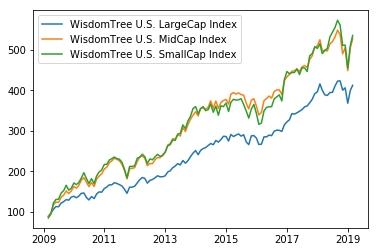

In [25]:
x = df.index
plt.plot(x,ret_wtepstr,label='WisdomTree U.S. LargeCap Index')
plt.plot(x,ret_meitr,label='WisdomTree U.S. MidCap Index')
plt.plot(x,ret_seitr,label='WisdomTree U.S. SmallCap Index')
plt.legend()
plt.show()

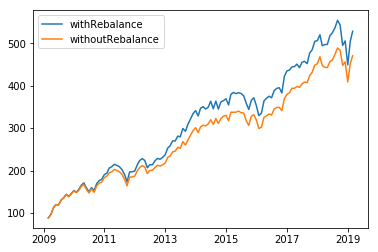

In [26]:
#Plot a $100 for the porofolio
plt.plot(100*(1+df['PortfolioReturn_withRebalance']),label='withRebalance')
plt.plot(100*(1+df['PortfolioReturn_withoutRebalance']),label='withoutRebalance')
plt.legend()
plt.show()